<a href="https://colab.research.google.com/github/npgeorge/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Nicholas_George_LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

t statistic signal/noise

t = Z / s = (X - u)/(stddev / normdist)

The more T value the more you have a difference to reject the null hypothesis

T statistics is ratio between signal and noise

reject the null hypothesis if it is less than .05

First conduct the threshold then conduct the test, which is why null is rejected at .05 or below, not a perfect solution but is a solution

T ratio is comparing at least two sample sets of data, if the ratio is close, move forward because they are relatable and the signal is stronger than the noise, if they are not, then the sets of data are too far off to be considered comparable or reliable, and the noise is strong relative to the signal baseline.

t test does not assume normal distribution, it has more area under the tails

In [80]:
### YOUR CODE STARTS HERE
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [81]:
rename_columns = {
    0: 'Class Name',
    1: 'Handicapped Infants',
    2: 'Water Project Cost Sharing',
    3: 'Adoption of the Budget Resolution',
    4: 'Physician Free Freeze',
    5: 'El Salvador Aid',
    6: 'Religious Groups in Schools',
    7: 'Anti-Satellite Test Ban',
    8: 'Aid to Nicaraguan Contras',
    9: 'MX Missile',
    10: 'Immigration',
    11: 'Synfuels Corporation Cutback',
    12: 'Education Spending',
    13: 'Superfund Right to Sue',
    14: 'Crime',
    15: 'Duty Free Exports',
    16: 'Export Administration Act South Africa',
}
df = df.rename(columns=rename_columns)

df.head()

,Class Name,Handicapped Infants,Water Project Cost Sharing,Adoption of the Budget Resolution,Physician Free Freeze,El Salvador Aid,Religious Groups in Schools,Anti-Satellite Test Ban,Aid to Nicaraguan Contras,MX Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act South Africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [82]:
#cleaning up the question marks, y's, and n's, replacing with 0, 1, and -1
#in the data set information, also decribed as the "unknown disposition"
df = df.replace(to_replace =('?','y','n'), value = (0,1,-1))

df.head()

,Class Name,Handicapped Infants,Water Project Cost Sharing,Adoption of the Budget Resolution,Physician Free Freeze,El Salvador Aid,Religious Groups in Schools,Anti-Satellite Test Ban,Aid to Nicaraguan Contras,MX Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act South Africa
0,republican,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1


In [0]:
republicans = df.groupby('Class Name').get_group('republican')
democrats = df.groupby('Class Name').get_group('democrat')

In [84]:
republicans.shape

(168, 17)

In [85]:
democrats.shape
#looks like democrats outnumber republicans significantly

(267, 17)

In [86]:
df['Handicapped Infants'].value_counts()

-1    236
 1    187
 0     12
Name: Handicapped Infants, dtype: int64

In [87]:
df = df.set_index('Class Name')
df.head()

,Handicapped Infants,Water Project Cost Sharing,Adoption of the Budget Resolution,Physician Free Freeze,El Salvador Aid,Religious Groups in Schools,Anti-Satellite Test Ban,Aid to Nicaraguan Contras,MX Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act South Africa
Class Name,,,,,,,,,,,,,,,,
republican,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1


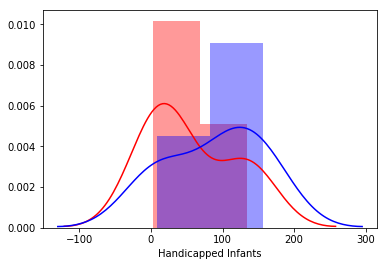

In [88]:
#1st column
reps_hand_inf = republicans['Handicapped Infants'].value_counts()
sns.distplot(reps_hand_inf,color='r');

dems_hand_inf = democrats['Handicapped Infants'].value_counts()
sns.distplot(dems_hand_inf, color='b');

 1    75
-1    73
 0    20
Name: Water Project Cost Sharing, dtype: int64
 1    120
-1    119
 0     28
Name: Water Project Cost Sharing, dtype: int64


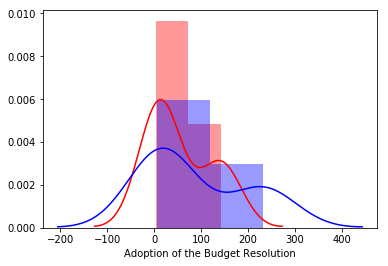

In [89]:
#2nd column
reps_wpcs = republicans['Water Project Cost Sharing'].value_counts()
sns.distplot(reps_pcs,color='r');
print(reps_wpcs);

dems_wpcs = democrats['Water Project Cost Sharing'].value_counts()
sns.distplot(dems_pcs, color='b');
print(dems_wpcs);

-1    142
 1     22
 0      4
Name: Adoption of the Budget Resolution, dtype: int64
 1    231
-1     29
 0      7
Name: Adoption of the Budget Resolution, dtype: int64


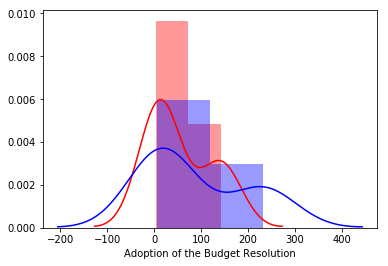

In [93]:
#3rd column
reps_abr = republicans['Adoption of the Budget Resolution'].value_counts()
sns.distplot(reps_abr,color='r');
print(reps_abr)

dems_abr = democrats['Adoption of the Budget Resolution'].value_counts()
sns.distplot(dems_abr, color='b');
print(dems_abr)

 1    163
 0      3
-1      2
Name: Physician Free Freeze, dtype: int64
-1    245
 1     14
 0      8
Name: Physician Free Freeze, dtype: int64


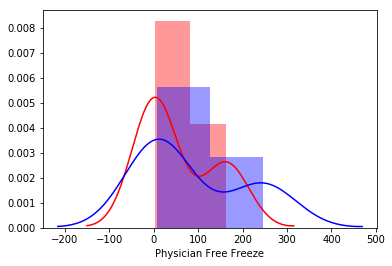

In [94]:
#4th column
reps_pff = republicans['Physician Free Freeze'].value_counts()
sns.distplot(reps_pff,color='r');
print(reps_pff)

dems_pff = democrats['Physician Free Freeze'].value_counts()
sns.distplot(dems_pff, color='b');
print(dems_pff)

 1    157
-1      8
 0      3
Name: El Salvador Aid, dtype: int64
-1    200
 1     55
 0     12
Name: El Salvador Aid, dtype: int64


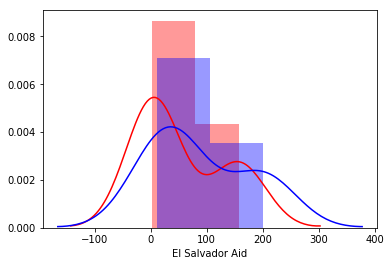

In [95]:
#5th column
reps_ela = republicans['El Salvador Aid'].value_counts()
sns.distplot(reps_ela,color='r');
print(reps_ela)

dems_ela = democrats['El Salvador Aid'].value_counts()
sns.distplot(dems_ela, color='b');
print(dems_ela)

 1    149
-1     17
 0      2
Name: Religious Groups in Schools, dtype: int64
-1    135
 1    123
 0      9
Name: Religious Groups in Schools, dtype: int64


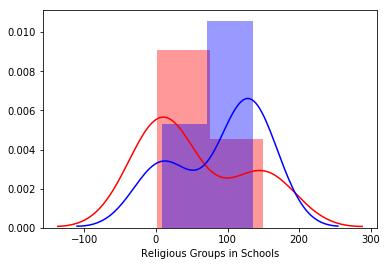

In [98]:
#6th column
reps_rga = republicans['Religious Groups in Schools'].value_counts()
sns.distplot(reps_rga,color='r');
print(reps_rga)

dems_rga = democrats['Religious Groups in Schools'].value_counts()
sns.distplot(dems_rga, color='b');
print(dems_rga)

 1    149
-1     17
 0      2
Name: Religious Groups in Schools, dtype: int64
 1    200
-1     59
 0      8
Name: Anti-Satellite Test Ban, dtype: int64


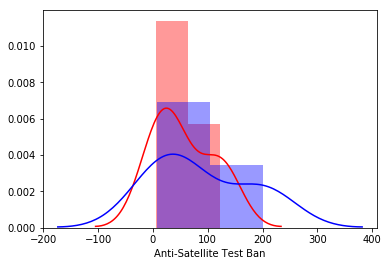

In [99]:
#7th column
reps_astb = republicans['Anti-Satellite Test Ban'].value_counts()
sns.distplot(reps_astb,color='r');
print(reps_rga)

dems_astb = democrats['Anti-Satellite Test Ban'].value_counts()
sns.distplot(dems_astb, color='b');
print(dems_astb)

-1    133
 1     24
 0     11
Name: Aid to Nicaraguan Contras, dtype: int64
 1    218
-1     45
 0      4
Name: Aid to Nicaraguan Contras, dtype: int64


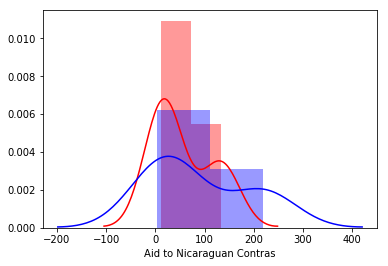

In [100]:
#8th column
reps_anc = republicans['Aid to Nicaraguan Contras'].value_counts()
sns.distplot(reps_anc,color='r');
print(reps_anc)

dems_anc = democrats['Aid to Nicaraguan Contras'].value_counts()
sns.distplot(dems_anc, color='b');
print(dems_anc)

-1    146
 1     19
 0      3
Name: MX Missile, dtype: int64
 1    188
-1     60
 0     19
Name: MX Missile, dtype: int64


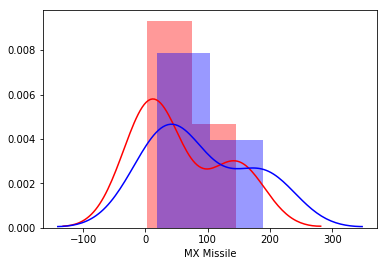

In [101]:
#9th column
reps_mx = republicans['MX Missile'].value_counts()
sns.distplot(reps_mx,color='r');
print(reps_mx)

dems_mx = democrats['MX Missile'].value_counts()
sns.distplot(dems_mx, color='b');
print(dems_mx)

 1    92
-1    73
 0     3
Name: Immigration, dtype: int64
-1    139
 1    124
 0      4
Name: Immigration, dtype: int64


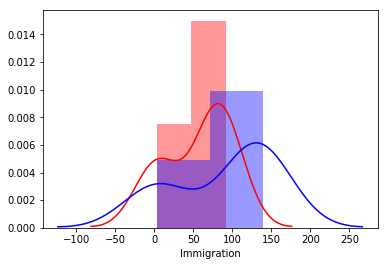

In [102]:
#10th column
reps_imm = republicans['Immigration'].value_counts()
sns.distplot(reps_imm,color='r');
print(reps_imm)

dems_imm = democrats['Immigration'].value_counts()
sns.distplot(dems_imm, color='b');
print(dems_imm)

-1    138
 1     21
 0      9
Name: Synfuels Corporation Cutback, dtype: int64
 1    129
-1    126
 0     12
Name: Synfuels Corporation Cutback, dtype: int64


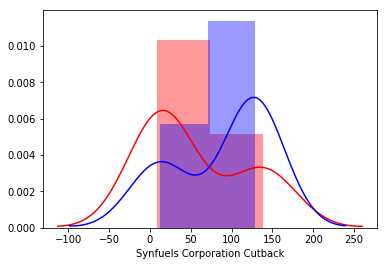

In [103]:
#11th column
reps_scc = republicans['Synfuels Corporation Cutback'].value_counts()
sns.distplot(reps_scc,color='r');
print(reps_scc)

dems_scc = democrats['Synfuels Corporation Cutback'].value_counts()
sns.distplot(dems_scc, color='b');
print(dems_scc)

 1    135
-1     20
 0     13
Name: Education Spending, dtype: int64
-1    213
 1     36
 0     18
Name: Education Spending, dtype: int64


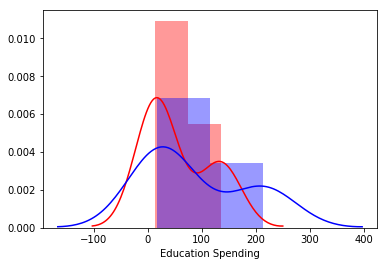

In [104]:
#12th column
reps_es = republicans['Education Spending'].value_counts()
sns.distplot(reps_es,color='r');
print(reps_es)

dems_es = democrats['Education Spending'].value_counts()
sns.distplot(dems_es, color='b');
print(dems_es)

 1    136
-1     22
 0     10
Name: Superfund Right to Sue, dtype: int64
-1    179
 1     73
 0     15
Name: Superfund Right to Sue, dtype: int64


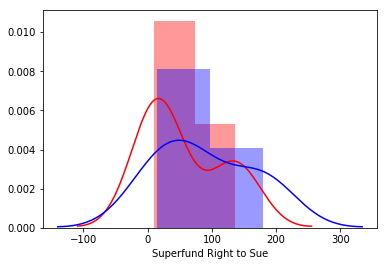

In [105]:
#13th column
reps_srs = republicans['Superfund Right to Sue'].value_counts()
sns.distplot(reps_srs,color='r');
print(reps_srs)

dems_srs = democrats['Superfund Right to Sue'].value_counts()
sns.distplot(dems_srs, color='b');
print(dems_srs)

 1    158
 0      7
-1      3
Name: Crime, dtype: int64
-1    167
 1     90
 0     10
Name: Crime, dtype: int64


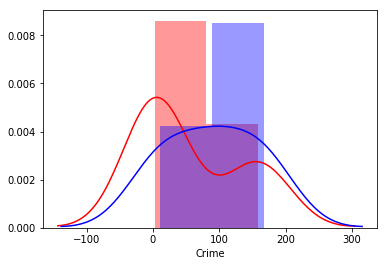

In [106]:
#14th column
reps_crime = republicans['Crime'].value_counts()
sns.distplot(reps_crime,color='r');
print(reps_crime)

dems_crime = democrats['Crime'].value_counts()
sns.distplot(dems_crime, color='b');
print(dems_crime)

-1    142
 1     14
 0     12
Name: Duty Free Exports, dtype: int64
 1    160
-1     91
 0     16
Name: Duty Free Exports, dtype: int64


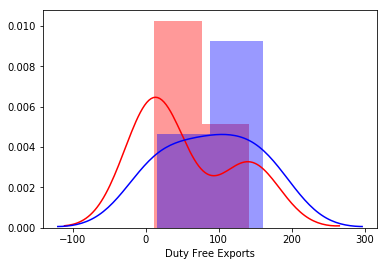

In [107]:
#15th column
reps_dfe = republicans['Duty Free Exports'].value_counts()
sns.distplot(reps_dfe,color='r');
print(reps_dfe)

dems_dfe = democrats['Duty Free Exports'].value_counts()
sns.distplot(dems_dfe, color='b');
print(dems_dfe)

 1    96
-1    50
 0    22
Name: Export Administration Act South Africa, dtype: int64
 1    173
 0     82
-1     12
Name: Export Administration Act South Africa, dtype: int64


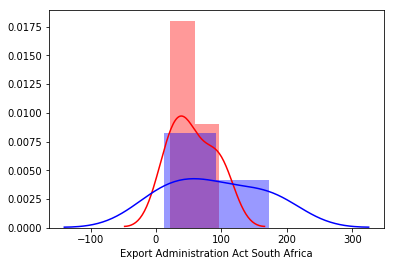

In [108]:
#16th column
reps_eaasa = republicans['Export Administration Act South Africa'].value_counts()
sns.distplot(reps_eaasa,color='r');
print(reps_eaasa)

dems_eaasa = democrats['Export Administration Act South Africa'].value_counts()
sns.distplot(dems_eaasa, color='b');
print(dems_eaasa)

In [114]:
#all the t-tests
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
#1: 'Handicapped Infants'
print(ttest_ind(reps_hand_inf, dems_hand_inf))
#2: 'Water Project Cost Sharing'
print(ttest_ind(reps_wpcs, dems_wpcs))
#3: 'Adoption of the Budget Resolution'
print(ttest_ind(reps_abr, dems_abr))
#4: 'Physician Free Freeze'
print(ttest_ind(reps_pff, dems_pff))
#5: 'El Salvador Aid'
print(ttest_ind(reps_ela, dems_ela))
#6: 'Religious Groups in Schools'
print(ttest_ind(reps_rga, dems_rga))
#7: 'Anti-Satellite Test Ban'
print(ttest_ind(reps_astb, dems_astb))
#8: 'Aid to Nicaraguan Contras'
print(ttest_ind(reps_anc, dems_anc))
#9: 'MX Missile'
print(ttest_ind(reps_mx, dems_mx))
#10: 'Immigration'
print(ttest_ind(reps_imm, dems_imm))
#11: 'Synfuels Corporation Cutback'
print(ttest_ind(reps_scc, dems_scc))
#12: 'Education Spending'
print(ttest_ind(reps_es, dems_es))
#13: 'Superfund Right to Sue'
print(ttest_ind(reps_srs, dems_srs))
#14: 'Crime'
print(ttest_ind(reps_crime, dems_crime))
#15: 'Duty Free Exports'
print(ttest_ind(reps_dfe, dems_dfe))
#16: 'Export Administration Act South Africa'
print(ttest_ind(reps_eaasa, dems_eaasa))


Ttest_indResult(statistic=-0.5635196823078739, pvalue=0.6031728758112465)
Ttest_indResult(statistic=-0.9316435034004519, pvalue=0.404259613962304)
Ttest_indResult(statistic=-0.3956330227533918, pvalue=0.7125697027730575)
Ttest_indResult(statistic=-0.3488338310948767, pvalue=0.7448019356243882)
Ttest_indResult(statistic=-0.4338101476909356, pvalue=0.6867986127446806)
Ttest_indResult(statistic=-0.5358244397314771, pvalue=0.6204868603001733)
Ttest_indResult(statistic=-0.4913892699623653, pvalue=0.6488937905648445)
Ttest_indResult(statistic=-0.433435796853755, pvalue=0.6870489156428523)
Ttest_indResult(statistic=-0.48463078952613176, pvalue=0.653280288523204)
Ttest_indResult(statistic=-0.6525597308247394, pvalue=0.5496428366396844)
Ttest_indResult(statistic=-0.5855630888148328, pvalue=0.5896134608564674)
Ttest_indResult(statistic=-0.44761110049834707, pvalue=0.6776049619642712)
Ttest_indResult(statistic=-0.5272525342315976, pvalue=0.6259073178042157)
Ttest_indResult(statistic=-0.4835889449